# 定义深度神经网络

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, Sequential, optimizers, layers

### 1. 准备数据

In [19]:
(x_train_all, y_train_all), (x_test, y_test) = datasets.fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


### 2. 构建模型

In [28]:
# 定义一个 10 层的神经网络
model = keras.models.Sequential()
model.add(layers.Flatten(input_shape=[28, 28]))
for _ in range(10):
    model.add(layers.Dense(50, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

# relu: y = max(0, x)
# softmax: 将向量变成概率分布. x = [x1, x2, x3], 
#          y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3
optimizer = optimizers.SGD(learning_rate=0.001)
# reason for sparse: y->index. y->one_hot->[] 
# 通过 sparse 可以使 y 变为向量
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
             metrics=["accuracy"])

In [29]:
history = model.fit(x_train_scaled, y_train, epochs=5, validation_data=(x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 7s 124us/sample - loss: 2.2891 - accuracy: 0.1550 - val_loss: 2.2672 - val_accuracy: 0.3064
Epoch 2/5
55000/55000 [==============================] - 6s 112us/sample - loss: 2.1668 - accuracy: 0.3669 - val_loss: 1.9307 - val_accuracy: 0.4822
Epoch 3/5
55000/55000 [==============================] - 6s 113us/sample - loss: 1.2512 - accuracy: 0.5877 - val_loss: 0.8114 - val_accuracy: 0.6902
Epoch 4/5
55000/55000 [==============================] - 6s 110us/sample - loss: 0.7641 - accuracy: 0.7062 - val_loss: 0.7033 - val_accuracy: 0.7346
Epoch 5/5
55000/55000 [==============================] - 7s 122us/sample - loss: 0.6555 - accuracy: 0.7599 - val_loss: 0.5783 - val_accuracy: 0.7938


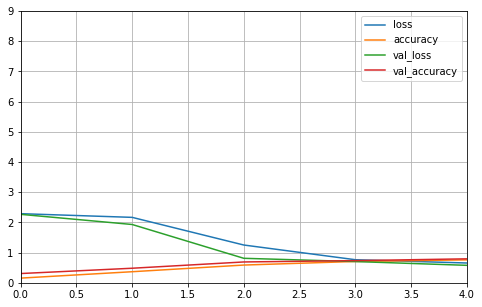

In [31]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 3)
    plt.gca().set_ylim(0, 9)
plot_learning_curves(history)

# 1. 参数众多， 训练不充分
# 2. 梯度消失

In [32]:
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.6206212072372437, 0.7745]